# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf


In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     522.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.28e-62
Time:                        00:16:30   Log-Likelihood:                -108.15
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1597      0.056    -20.624      0.0

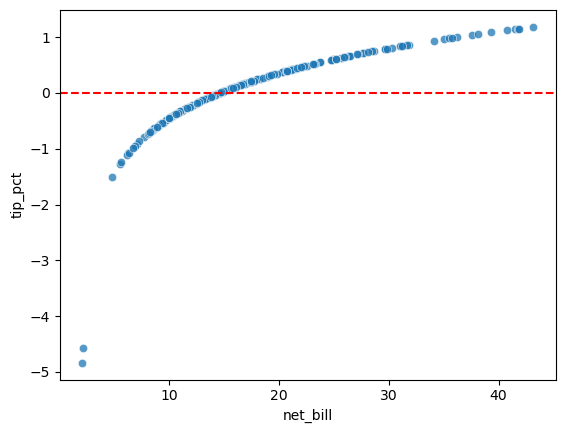

In [8]:
#Ajuste do modelo
tips['tip_pct'] = np.log((tips['net_bill']-(tips['net_bill'].min()-.1)))

tips['tip_pct'] = tips['tip_pct'] - tips['tip_pct'].mean()

reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


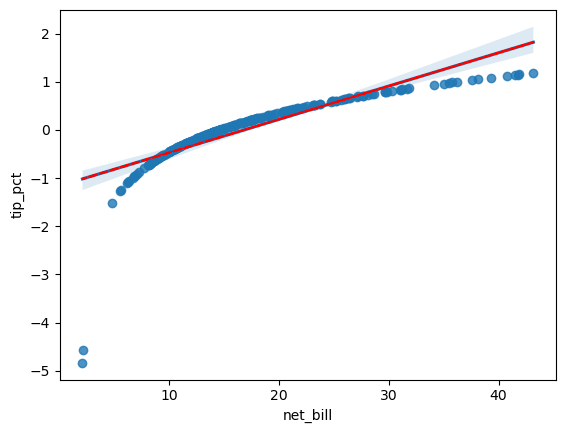

In [6]:

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     536.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.87e-89
Time:                        00:17:06   Log-Likelihood:                -41.608
No. Observations:                 244   AIC:                             89.22
Df Residuals:                     241   BIC:                             99.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.20

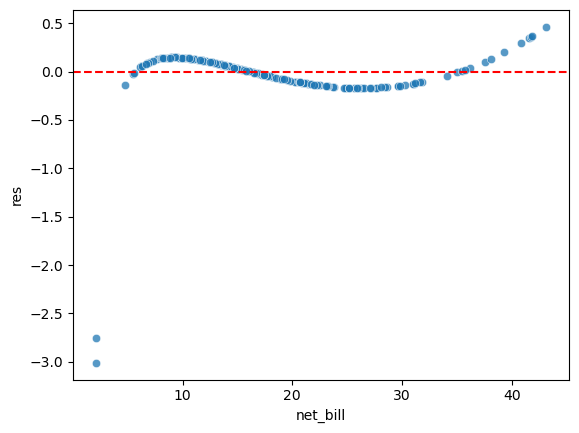

In [9]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     164.9
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.82e-24
Time:                        00:17:19   Log-Likelihood:                -133.61
No. Observations:                 122   AIC:                             271.2
Df Residuals:                     120   BIC:                             276.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8909      0.220    -17.697      0.0

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


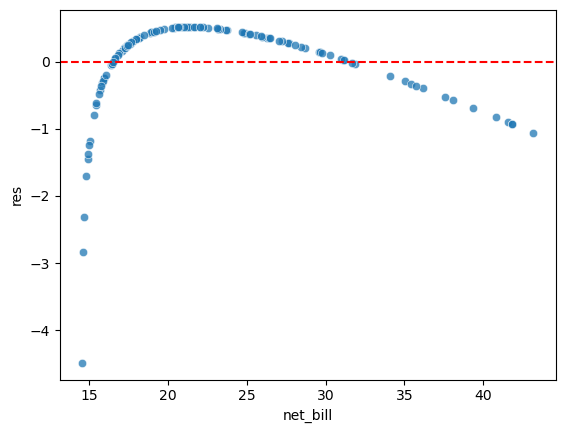

In [10]:


reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2280.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.70e-125
Time:                        00:23:57   Log-Likelihood:                 37.480
No. Observations:                 244   AIC:                            -70.96
Df Residuals:                     242   BIC:                            -63.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.65

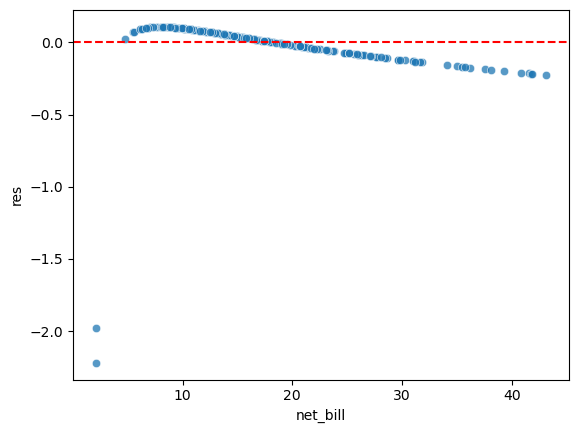

In [17]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [20]:
#Cálculo do R-quadrado
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]
R_quadrado = r**2
print(f"O R-quadrado é: {R_quadrado:.2f}")
print("Resultado semelhante ao calculado reg.summary()")

O R-quadrado é: 0.90
Resultado semelhante ao calculado reg.summary()


###  6. qual modelo resultou no melhor ajuste?

O **modelo no log do tip_pct em função do log de net_bill**, pois apresenta um R-quadrado de 0.90, o que indica que aproximadamente 90% da variabilidade na variável dependente foi explicada pelas variáveis independentes incluídas no modelo de regressão. Em outras palavras, o modelo é capaz de explicar uma grande parte da variação observada nos dados.